In [1]:
pip install numpy pandas matplotlib seaborn tensorflow keras yfinance alpha_vantage


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf


In [25]:
# Fetch ETF data (e.g., NIFTYBEES)
ticker = 'NIFTYBEES.NS'
etf_data = yf.download(ticker, start='2022-01-01', end='2024-11-27')

# Display the data
print(etf_data)


[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                    NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS   
Date                                                                            
2022-01-03 00:00:00+00:00   190.720001   190.720001   190.949997   185.300003   
2022-01-04 00:00:00+00:00   192.460007   192.460007   198.910004   189.199997   
2022-01-05 00:00:00+00:00   193.339996   193.339996   195.000000   191.300003   
2022-01-06 00:00:00+00:00   191.919998   191.919998   193.000000   190.750000   
2022-01-07 00:00:00+00:00   192.419998   192.419998   194.000000   191.399994   
...                                ...          ...          ...          ...   
2024-11-19 00:00:00+00:00   263.070007   263.070007   265.989990   262.380005   
2024-11-21 00:00:00+00:00   261.290009   261.290009   264.950012   260.519989   
2024-11-22 00:00:00+00:00   266.859985   266.859985   267.339996   261.059998   
2024-11-25 00:00:00+00:00   

In [6]:
etf_data = etf_data.dropna()


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
etf_data['Close_scaled'] = scaler.fit_transform(etf_data[['Close']])


In [16]:
# Define sequence length
sequence_length = 180

# Create sequences
data = etf_data['Close_scaled'].values
X, y = [], []

for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])
    y.append(data[i])

X, y = np.array(X), np.array(y)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\jinay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - loss: 0.0956 - val_loss: 0.0106
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0124 - val_loss: 0.0037
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0040 - val_loss: 9.8250e-04
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0035 - val_loss: 9.5517e-04
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 21

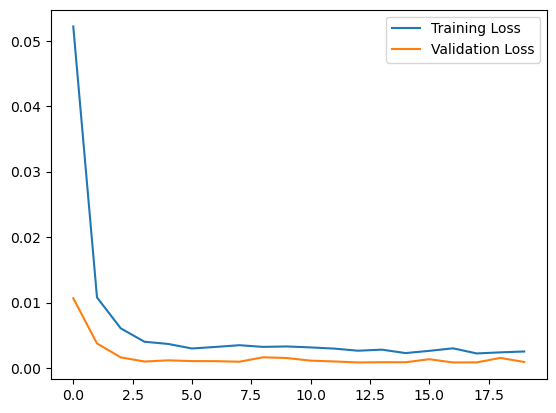

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


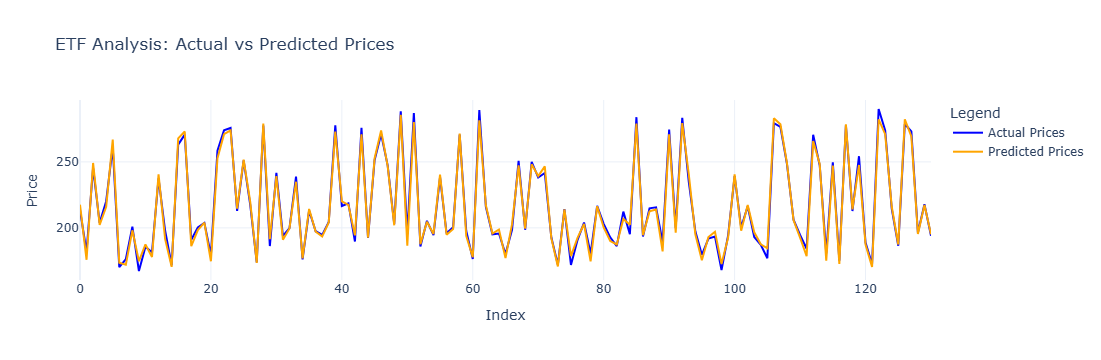

In [21]:
import plotly.graph_objects as go
import pandas as pd

# Ensure predictions and actual values are in the same DataFrame for better plotting
results = pd.DataFrame({
    'Actual': y_test_actual.flatten(),
    'Predicted': predictions.flatten(),
    'Index': range(len(y_test_actual))
})

# Create an interactive plot
fig = go.Figure()

# Add actual prices trace
fig.add_trace(go.Scatter(
    x=results['Index'],
    y=results['Actual'],
    mode='lines',
    name='Actual Prices',
    line=dict(color='blue'),
    hovertemplate='Index: %{x}<br>Actual Price: %{y:.2f}<extra></extra>'
))

# Add predicted prices trace
fig.add_trace(go.Scatter(
    x=results['Index'],
    y=results['Predicted'],
    mode='lines',
    name='Predicted Prices',
    line=dict(color='orange'),
    hovertemplate='Index: %{x}<br>Predicted Price: %{y:.2f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='ETF Analysis: Actual vs Predicted Prices',
    xaxis_title='Index',
    yaxis_title='Price',
    legend_title='Legend',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


In [22]:
model.save('etf_analysis_model.h5')


In [26]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fetch data from API
API_KEY = '3Y076SBXD36WH4TZ'
symbol = 'NIFTYBEES'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}&datatype=csv'
data = pd.read_csv(url)

# Preprocess Data
data['date'] = pd.to_datetime(data['timestamp'])
data.set_index('date', inplace=True)
data = data[['close']].sort_index()
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_close'] = scaler.fit_transform(data[['close']])

# Create time-series features
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, Y = create_dataset(data['scaled_close'].values, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Visualizations
df_results = pd.DataFrame({'Actual': actual.flatten(), 'Predicted': predictions.flatten()})
df_results.index = data.index[-len(df_results):]

# Interactive Plot
fig = px.line(df_results, x=df_results.index, y=['Actual', 'Predicted'], title='ETF Price Predictions',
              labels={'value': 'Price', 'index': 'Date'}, hover_data={'Actual': True, 'Predicted': True})
fig.show()

# Interpretation
mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error: {mse}")


KeyError: 'timestamp'